In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import math

In [2]:
X_w = np.array([[2,2,2],[-2,2,2],[-2,2,-2],[2,2,-2],[2,-2,2],[-2,-2,2],[-2,-2,-2],[2,-2,-2]])
U = np.array([[422,323],[178,323],[118,483],[482,483],[438,73],[162,73],[78,117],[522,117]])

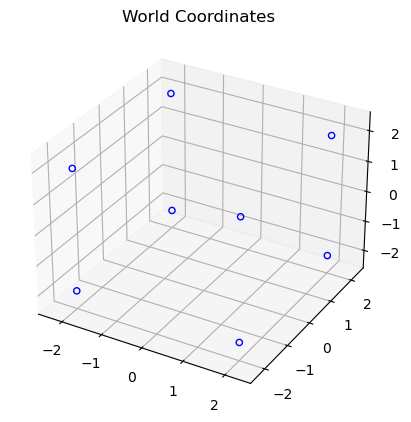

In [3]:
fig = plt.figure(figsize=(5, 5), dpi=100)
ax = fig.add_subplot(projection='3d')
ax.set_xlim(-2.5,2.5)
ax.set_ylim(-2.5,2.5)
ax.set_zlim(-2.5,2.5)
for corner in X_w:
    ax.scatter(corner[0], corner[1], corner[2], facecolors='none', edgecolors='blue')
ax.set_title("World Coordinates")
plt.show()

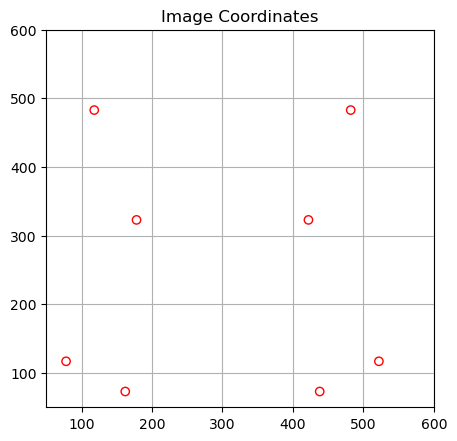

In [4]:
fig = plt.figure(figsize=(5, 5), dpi=100)
ax = fig.add_subplot(1,1,1)
ax.set_xlim(50,600)
ax.set_ylim(50,600)
for corner in U:
    ax.scatter(corner[0], corner[1], facecolors='none', edgecolors='red')
ax.set_title("Image Coordinates")
plt.grid()
plt.show()

In [5]:
def calPmatrix(Xw_i, U_i):
    l = len(Xw_i)
    p = np.zeros((2, 3*(l+1)))
    Xw_i = np.array([*Xw_i, 1])
    zeros = np.zeros((1,l+1), dtype=int)
    p[0,:] = [*Xw_i, *zeros[0], *(Xw_i*-U_i[0])]
    p[1,:] = [*zeros[0], *Xw_i, *(Xw_i*-U_i[1])]

    return p

In [6]:
x, y = X_w.shape
P = np.zeros((2*x, 3*(y+1))) # 2 rows corresponding to each corner points, 3 rows of projection matrix and y+1 columns: flattened to 12 columns per row
for i in range(x):
    P[2*i:2*i+2, :] = calPmatrix(X_w[i], U[i])
print("Shape of matrix P: {}".format(P.shape))
print(P)

Shape of matrix P: (16, 12)
[[ 2.000e+00  2.000e+00  2.000e+00  1.000e+00  0.000e+00  0.000e+00
   0.000e+00  0.000e+00 -8.440e+02 -8.440e+02 -8.440e+02 -4.220e+02]
 [ 0.000e+00  0.000e+00  0.000e+00  0.000e+00  2.000e+00  2.000e+00
   2.000e+00  1.000e+00 -6.460e+02 -6.460e+02 -6.460e+02 -3.230e+02]
 [-2.000e+00  2.000e+00  2.000e+00  1.000e+00  0.000e+00  0.000e+00
   0.000e+00  0.000e+00  3.560e+02 -3.560e+02 -3.560e+02 -1.780e+02]
 [ 0.000e+00  0.000e+00  0.000e+00  0.000e+00 -2.000e+00  2.000e+00
   2.000e+00  1.000e+00  6.460e+02 -6.460e+02 -6.460e+02 -3.230e+02]
 [-2.000e+00  2.000e+00 -2.000e+00  1.000e+00  0.000e+00  0.000e+00
   0.000e+00  0.000e+00  2.360e+02 -2.360e+02  2.360e+02 -1.180e+02]
 [ 0.000e+00  0.000e+00  0.000e+00  0.000e+00 -2.000e+00  2.000e+00
  -2.000e+00  1.000e+00  9.660e+02 -9.660e+02  9.660e+02 -4.830e+02]
 [ 2.000e+00  2.000e+00 -2.000e+00  1.000e+00  0.000e+00  0.000e+00
   0.000e+00  0.000e+00 -9.640e+02 -9.640e+02  9.640e+02 -4.820e+02]
 [ 0.000e+00 

In [7]:
'''
Matlab's svd command returns U, S and V, while numpy.linalg.svd returns U, the diagonal of S, and V^H
V = VH.T.conj() # if you know you have real values only you can leave out the .conj()
instead of transposing and taking last column vector, we can take last row vector from V^H returned by numpy.linalg.svd
'''
U, S, V = np.linalg.svd(P)
M = V[-1].reshape(3,4)
print("Projection Matrix:\n",str(np.round_(M, 4)))

Projection Matrix:
 [[-1.925e-01 -2.830e-02 -7.860e-02 -7.346e-01]
 [-0.000e+00 -2.044e-01 -1.000e-04 -6.120e-01]
 [-0.000e+00 -1.000e-04 -3.000e-04 -2.400e-03]]


In [8]:
mU, mS, mV = np.linalg.svd(M)
center = mV[-1,:-1]/mV[-1, -1]
print("Euclidean coordinates of camera center in the frame of reference of the cube:\n[x, y, z] = ",str(np.round_(center, 6)))

Euclidean coordinates of camera center in the frame of reference of the cube:
[x, y, z] =  [-4.000000e-06 -2.991214e+00 -8.269539e+00]


In [9]:
M_prime = M[:,:-1]
M_prime = M_prime/M_prime[-1,-1]
print("Normalized M':\n",str(M_prime))

Normalized M':
 [[7.34628863e+02 1.07895535e+02 2.99999893e+02]
 [9.25005842e-04 7.80144198e+02 2.64050222e-01]
 [3.71488286e-06 3.59651924e-01 1.00000000e+00]]


In [10]:
cos_theta_x = M_prime[-1,-1]/math.sqrt(M_prime[-1,-1]**2 + M_prime[-1,-2]**2)
sin_theta_x = -M_prime[-1,-2]/math.sqrt(M_prime[-1,-1]**2 + M_prime[-1,-2]**2)

In [11]:
Rx = np.array([[1, 0, 0], [0, cos_theta_x, -sin_theta_x], [0, sin_theta_x, cos_theta_x]])
N = M_prime @ Rx
theta_x = math.asin(sin_theta_x) * 180 / math.pi

print("Rx:\n{}\n\ntheta_x = {}\n\nN:\n{}".format(Rx, theta_x, N))

Rx:
[[ 1.          0.          0.        ]
 [ 0.          0.94099175  0.33842949]
 [ 0.         -0.33842949  0.94099175]]

theta_x = -19.78121922876508

N:
[[ 7.34628863e+02 -3.67940535e-06  3.18812456e+02]
 [ 9.25005842e-04  7.34019893e+02  2.64272275e+02]
 [ 3.71488286e-06  0.00000000e+00  1.06270857e+00]]


In [12]:
cos_theta_z = N[1,1]/math.sqrt(N[1,0]**2 + N[1,1]**2)
sin_theta_z = -N[1,0]/math.sqrt(N[1,0]**2 + N[1,1]**2)

In [13]:
Rz = np.array([[cos_theta_z, -sin_theta_z, 0], [sin_theta_z, cos_theta_z, 0], [0, 0, 1]])
theta_z = math.asin(sin_theta_z) * 180 / math.pi
print("Rz:\n{}\n\ntheta_z = {}".format(Rz, theta_z))

Rz:
[[ 1.00000000e+00  1.26019179e-06  0.00000000e+00]
 [-1.26019179e-06  1.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00]]

theta_z = -7.220367084089655e-05


In [14]:
# cos_theta_y = N[0,0]/math.sqrt(N[0,0]**2 + N[0,2]**2)
# sin_theta_y = -N[0,2]/math.sqrt(N[0,0]**2 + N[0,2]**2)
# theta_y = math.asin(sin_theta_y) * 180 / math.pi
# Ry = np.array([[cos_theta_y, 0, sin_theta_y], [0, 1, 0], [-sin_theta_y, 0, cos_theta_y]])
# print("Ry:\n{}\n\ntheta_y = {}".format(Ry, theta_y))

In [15]:
# R matrix is orthogonal matrix, hence its inverse will be same as its transpose
K = M_prime @ (np.transpose(Rz) @ np.transpose(Rx))
K = K / K[2,2]
f = np.array([K[0,0], K[1,1]])
o = np.array([K[0,2], K[1,2]])

print("Calibration Matrix:\n{}\n\nFocal Lengths: {}\n\nPixel Coordinates of Image Center: {}".format(K, f, o))

Calibration Matrix:
[[ 8.96681894e+02  2.47849337e+02  3.00000277e+02]
 [ 2.32905594e-03  8.96156575e+02 -3.21961928e+02]
 [ 5.08756351e-06  8.26168312e-01  1.00000000e+00]]

Focal Lengths: [896.68189361 896.15657474]

Pixel Coordinates of Image Center: [ 300.00027691 -321.96192818]
